In [1]:
import pandas as pd

In [2]:
def extract_header(filename, comment_prefix, header_row_index, header_row_delimiter):
    """
    Function to extract header from data file
    """
    with open(filename) as f:
        header_lines = []
        for line in f:
            if line[0] == comment_prefix:
                header_lines.append(line[1:].strip())
        headers = []
        for header in header_lines[header_row_index].split(header_row_delimiter):
            headers.append(header.strip())

    return headers

In [3]:
header = extract_header('Land_and_Ocean_summary.txt', comment_prefix='%', 
                        header_row_index=-1, header_row_delimiter=',')
header

['Year',
 'Annual Anomaly',
 'Annual Unc.',
 'Five-year Anomaly',
 'Five-year Unc.',
 'Annual Anomaly',
 'Annual Unc.',
 'Five-year Anomaly',
 'Five-year Unc.']

In [4]:
def read_anomaly_data_into_dataframe(filename, header, max_cols, comment_prefix):
    """Function reading temperature anomaly data into a dataframe"""
    df = pd.read_table(filename, comment=comment_prefix, names=header[:max_cols], 
                       delimiter=r"\s+", index_col=0, usecols=range(max_cols))
    return df

In [5]:
anomaly_data = read_anomaly_data_into_dataframe('Land_and_Ocean_summary.txt', header, 
                                                max_cols=5, comment_prefix='%')
anomaly_data

,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.
Year,,,,
1850,-0.532,0.154,NaN,NaN
1851,-0.405,0.169,NaN,NaN
1852,-0.395,0.165,-0.423,0.121
1853,-0.418,0.158,-0.384,0.109
1854,-0.363,0.142,-0.400,0.090
...,...,...,...,...
2014,0.675,0.045,0.728,0.040
2015,0.814,0.043,0.777,0.041
2016,0.949,0.044,0.808,0.040


In [6]:
def anomaly_avg_per_decade(anomaly_df):
    """
    Function that calculates average per decade
    """
    anomaly_avg = anomaly_df['Annual Anomaly'].groupby(anomaly_df.index // 10 * 10).mean()
    return anomaly_avg

In [7]:
anomalies_per_decade = anomaly_avg_per_decade(anomaly_data)
anomalies_per_decade

Year
1850   -0.441500
1860   -0.406900
1870   -0.297600
1880   -0.403400
1890   -0.391000
1900   -0.395700
1910   -0.402900
1920   -0.250800
1930   -0.128200
1940    0.013200
1950   -0.015800
1960   -0.015100
1970   -0.007300
1980    0.169800
1990    0.338600
2000    0.551000
2010    0.723222
Name: Annual Anomaly, dtype: float64

<Axes: xlabel='Year', ylabel='Anomalies'>

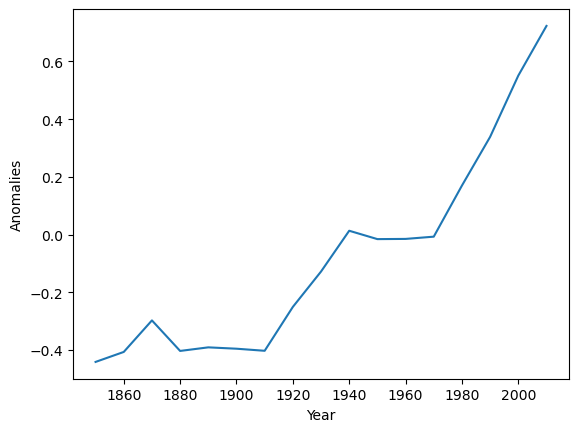

In [8]:
import matplotlib.pyplot as plt
anomalies_per_decade.plot(ylabel='Anomalies')